# Read the dataset

There are 4 datasets to read:
- Customer demographic: cd
- customer address: ca
- transactions: ts
- new customer: nc

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

In [5]:
cd = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = 'CustomerDemographic', skiprows =1)
ca = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = 4, skiprows =1)
ts = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = 1, skiprows =1)
nc = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = 2, skiprows =1)

join cd,ca,ts by customer_id 

In [6]:
#print(cd.info(), ca.info(), ts.info())

In [7]:
#print(set(ca.customer_id)- set(cd.customer_id))
#print(set(cd.customer_id)- set(ca.customer_id))

In [8]:
temp1 = pd.merge(ca,cd, how = 'outer', on = 'customer_id')

In [9]:
df = pd.merge(ts,temp1, how ='outer', on = 'customer_id')

In [10]:
#df.info()

# Data Quality Assessment

we will dive in each data to see what data it has and assess its consistency

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20510 entries, 0 to 20509
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  float64       
 1   product_id                           20000 non-null  float64       
 2   customer_id                          20510 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [12]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

transaction_id, product_id, customer_id is the system way to store customer, we just need to check the value_counts and the nan values

for transaction_date and DOB, since both of them are datetime, we will plot to check outliers or any abnormal time line

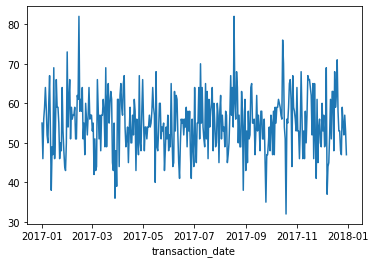

In [13]:
rs = df.groupby('transaction_date').transaction_id.count()
#rs.index, rs.values
sns.lineplot(x = rs.index, y = rs.values)

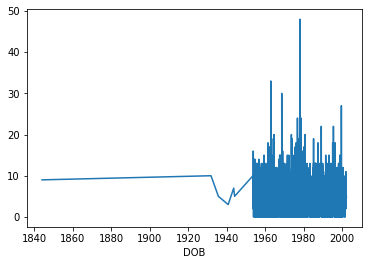

In [14]:
rs = df.groupby('DOB').transaction_id.count()
#rs.index, rs.values
sns.lineplot(x = rs.index, y = rs.values)


Since we find out that there are something strang in DOB, as in somepeople would have died now if they were born in 1840. Here we will dive in 

In [15]:
df.DOB.describe()

count                   20047
unique                   3448
top       1978-01-30 00:00:00
freq                       48
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [16]:
df['age'] = 2020 - df.DOB.apply(lambda x: int(x.strftime('%Y')) if x==x else None)

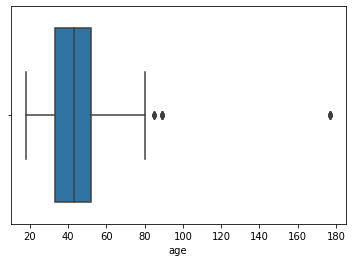

In [17]:
sns.boxplot(df.age)

In [18]:
df[['online_order','order_status']].apply(lambda x: x.value_counts(dropna=0))

,online_order,order_status
0.0,9811.0,NaN
1.0,9829.0,NaN
NaN,870.0,510.0
Approved,NaN,19821.0
Cancelled,NaN,179.0


In [19]:
df.iloc[:,[6,7,8,9]].apply(lambda x: x.value_counts(dropna=0))

,brand,product_line,product_class,product_size
Giant Bicycles,3312.0,NaN,NaN,NaN
Norco Bicycles,2910.0,NaN,NaN,NaN
OHM Cycles,3043.0,NaN,NaN,NaN
Solex,4253.0,NaN,NaN,NaN
Trek Bicycles,2990.0,NaN,NaN,NaN
WeareA2B,3295.0,NaN,NaN,NaN
NaN,707.0,707.0,707.0,707.0
Standard,NaN,14176.0,NaN,NaN
Road,NaN,3970.0,NaN,NaN
Touring,NaN,1234.0,NaN,NaN


In [20]:
pd.melt(df.loc[:,['list_price','standard_cost']])

,variable,value
0,list_price,71.49
1,list_price,1403.50
2,list_price,478.16
3,list_price,2091.47
4,list_price,1129.13
...,...,...
41015,standard_cost,NaN
41016,standard_cost,NaN
41017,standard_cost,NaN
41018,standard_cost,NaN


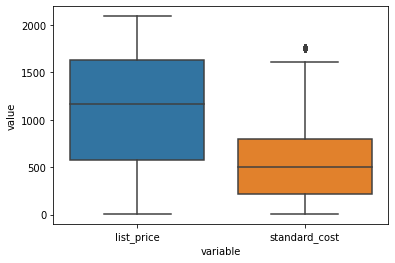

In [21]:
sns.boxplot(x ='variable', y = 'value', data =pd.melt(df.loc[:,['list_price','standard_cost']]))

In [22]:
from datetime import datetime


In [23]:
df.product_first_sold_date[0]


41245.0

In [24]:
df.product_first_sold_date =pd.to_timedelta(df.product_first_sold_date, unit = 'D')+ pd.to_datetime('1899-12-30')

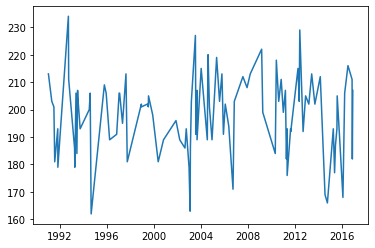

In [25]:
sns.lineplot(x = df.product_first_sold_date.value_counts().index, y = df.product_first_sold_date.value_counts().values)

In [26]:
df[['country','state','gender']].apply(lambda x: set(x))


country                                   {nan, Australia}
state      {nan, New South Wales, NSW, VIC, Victoria, QLD}
gender                 {nan, F, Female, U, Femal, Male, M}
dtype: object

In [27]:
df.state = df.state.replace(to_replace ={'New South Wales': 'NSW', 'Victoria':"VIC"})
df.gender = df.gender.replace(to_replace ={'Female': 'F', 'Femal':"F", "Male":"M"})

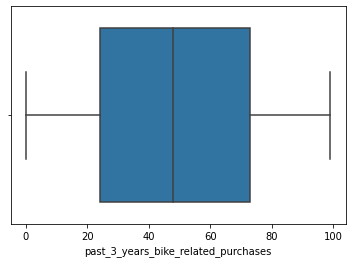

In [28]:
sns.boxplot(df.past_3_years_bike_related_purchases)

In [29]:
df[['job_industry_category']].apply(lambda x: set(x))

job_industry_category    {Financial Services, nan, Retail, Entertainmen...
dtype: object

In [30]:
df[['job_industry_category']].apply(lambda x: x.value_counts(dropna=0))

,job_industry_category
Manufacturing,4110
Financial Services,3973
NaN,3330
Health,3169
Retail,1812
Property,1333
IT,1118
Entertainment,711
Argiculture,591
Telecommunications,363


In [31]:
print(df.wealth_segment.value_counts(dropna=0),df.deceased_indicator.value_counts(dropna=0))

Mass Customer        10304
High Net Worth        5214
Affluent Customer     4986
NaN                      6
Name: wealth_segment, dtype: int64 N      20495
Y          9
NaN        6
Name: deceased_indicator, dtype: int64


In [32]:
df.default

0                              ã»(ï¿£âï¿£)ã»:*:
1                              ã»(ï¿£âï¿£)ã»:*:
2                              ã»(ï¿£âï¿£)ã»:*:
3        ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®
4        ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®
                          ...                  
20505                    Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
20506                                       0/0
20507                                       NaN
20508                                       NaN
20509                                       NaN
Name: default, Length: 20510, dtype: object

In [33]:
df.owns_car.value_counts(dropna= 0)

Yes    10317
No     10187
NaN        6
Name: owns_car, dtype: int64

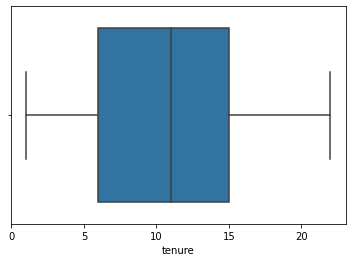

In [34]:
sns.boxplot(df.tenure)

In [35]:
dt = pd.DataFrame(list(zip(df.columns,df.isna().sum()/20510*100, df.isna().sum())))
dt

,0,1,2
0,transaction_id,2.486592,510
1,product_id,2.486592,510
2,customer_id,0.000000,0
3,transaction_date,2.486592,510
4,online_order,4.241833,870
5,order_status,2.486592,510
6,brand,3.447099,707
7,product_line,3.447099,707
8,product_class,3.447099,707
9,product_size,3.447099,707


In [36]:
#df[df.transaction_id.notna()]

In [37]:
20000-197-30

19773

Drop rows that has na value & drop columns last_name and default as it is not really necessary


In [38]:
df.dropna(subset =['transaction_id','brand','address','DOB','online_order'],axis =0,inplace = True)
df.drop(['last_name','default'], axis =1 , inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18986 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       18986 non-null  float64       
 1   product_id                           18986 non-null  float64       
 2   customer_id                          18986 non-null  int64         
 3   transaction_date                     18986 non-null  datetime64[ns]
 4   online_order                         18986 non-null  float64       
 5   order_status                         18986 non-null  object        
 6   brand                                18986 non-null  object        
 7   product_line                         18986 non-null  object        
 8   product_class                        18986 non-null  object        
 9   product_size                         18986 non-null  object        
 10  list_price

# Machine Model

Now it is good enough to build something, we will drop a few more unnecessary columns before apply any algorithm. Dropped columns are : first_name, address, country, DOB, postcode, job_title

In [40]:
dt = df.drop(['first_name', 'address', 'country', 'DOB', 'postcode', 'job_title'], axis = 1)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18986 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       18986 non-null  float64       
 1   product_id                           18986 non-null  float64       
 2   customer_id                          18986 non-null  int64         
 3   transaction_date                     18986 non-null  datetime64[ns]
 4   online_order                         18986 non-null  float64       
 5   order_status                         18986 non-null  object        
 6   brand                                18986 non-null  object        
 7   product_line                         18986 non-null  object        
 8   product_class                        18986 non-null  object        
 9   product_size                         18986 non-null  object        
 10  list_price

In [41]:
df2 =dt.drop(['online_order','order_status','brand','product_line','product_class',
              'product_size','product_first_sold_date'], axis =1)

In [42]:
revenue=df2[['transaction_id','customer_id','list_price']].groupby('customer_id').list_price.sum()
quantity = df2[['transaction_id','customer_id','list_price']].groupby('customer_id').transaction_id.count()

In [43]:
revenue

customer_id
1       9084.45
2       4149.07
4       1047.72
5       5903.20
6       5931.69
         ...   
3496    4725.38
3497    3744.07
3498    5177.06
3499    7673.48
3500    4922.41
Name: list_price, Length: 3411, dtype: float64

In [44]:
data = df2.drop(['transaction_id','product_id','list_price','standard_cost','transaction_date'], axis =1)

In [45]:
data.drop_duplicates(inplace = True)


In [46]:
temp = pd.merge(data,revenue, how = 'left', on = 'customer_id')
data = pd.merge(temp,quantity, how = 'left', on = 'customer_id')

In [47]:
data.rename(columns ={'list_price':'revenue','transaction_id': 'quantity'}, inplace= True)

In [48]:
data.set_index('customer_id')

,state,property_valuation,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,revenue,quantity
customer_id,,,,,,,,,,,,
2950,VIC,6.0,M,19.0,Financial Services,Mass Customer,N,Yes,10.0,65.0,1953.15,3
3120,NSW,5.0,F,89.0,Health,Mass Customer,N,Yes,10.0,41.0,7351.70,7
402,NSW,1.0,M,9.0,Retail,Affluent Customer,N,No,22.0,43.0,8148.22,6
3135,NSW,10.0,M,83.0,Financial Services,Mass Customer,N,No,16.0,58.0,7539.81,7
787,NSW,7.0,F,29.0,Retail,Affluent Customer,N,Yes,2.0,24.0,11292.54,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2115,VIC,4.0,M,17.0,Health,Mass Customer,N,Yes,17.0,45.0,2204.45,2
1569,NSW,10.0,M,87.0,NaN,Mass Customer,N,No,8.0,33.0,1466.68,1
130,NSW,7.0,M,32.0,Manufacturing,Mass Customer,N,No,1.0,23.0,3340.42,2


In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [50]:
mapping = {"N":0,"Y":1,"No":0,"Yes":1}
map2 = {'Mass Customer':0, 'Affluent Customer':1, 'High Net Worth':2}

In [51]:
data.job_industry_category.fillna('unknown',inplace= True)

In [52]:
data.deceased_indicator=data.deceased_indicator.map(mapping)
data.owns_car=data.owns_car.map(mapping)
data.wealth_segment= data.wealth_segment.map(map2)

In [53]:
print(set(data.job_industry_category),set(data.wealth_segment))

{'Financial Services', 'Retail', 'Entertainment', 'Argiculture', 'Telecommunications', 'IT', 'Manufacturing', 'unknown', 'Health', 'Property'} {0, 1, 2}


In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [55]:
data.job_industry_category = le.fit_transform(data.job_industry_category)
data.state = le.fit_transform(data.state)
data.gender= le.fit_transform(data.gender)

In [56]:
data.set_index('customer_id',inplace= True)

# Apply clustering technique with kmeans, pam and hclust

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [57]:
y_km = KMeans(n_clusters=5).fit(data)

In [200]:
sum_of_squared_distance = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters =k)
    model = km.fit(data)
    ssq= model.inertia_
    sum_of_squared_distance.append(ssq)


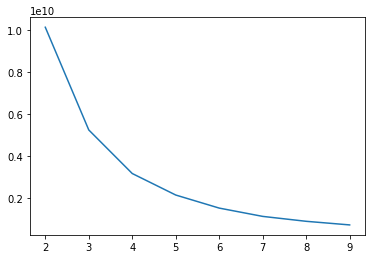

In [201]:
sns.lineplot(x = K, y = sum_of_squared_distance)

In [58]:
y_km.labels_

array([3, 2, 1, ..., 3, 3, 3], dtype=int32)

In [60]:
data['kmg'] = y_km.labels_

In [61]:
data.groupby('kmg').quantity.count()

kmg
0    997
1    628
2    938
3    610
4    238
Name: quantity, dtype: int64

In [73]:
data.groupby('kmg').revenue.mean()

kmg
0     4590.841525
1     9167.977930
2     6707.826429
3     2310.987230
4    12435.613067
Name: revenue, dtype: float64

In [76]:
data.groupby('kmg').revenue.sum()

kmg
0    4577069.00
1    5757490.14
2    6291941.19
3    1409702.21
4    2959675.91
Name: revenue, dtype: float64

In [79]:
data.groupby('kmg').revenue.mean()

kmg
0     4590.841525
1     9167.977930
2     6707.826429
3     2310.987230
4    12435.613067
Name: revenue, dtype: float64

In [80]:
data[data.kmg==3].describe()

,state,property_valuation,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,revenue,quantity,kmg
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.0,610.000000,610.000000,610.000000,610.000000,610.000000,610.0
mean,0.727869,7.544262,0.467213,48.711475,4.667213,0.770492,0.0,0.495082,10.836066,42.427869,2310.987230,2.852459,3.0
std,0.850795,2.770151,0.499333,28.581552,2.593235,0.840155,0.0,0.500386,5.753218,12.327451,846.208638,1.149514,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,19.000000,60.340000,1.000000,3.0
25%,0.000000,6.000000,0.000000,25.000000,2.000000,0.000000,0.0,0.000000,6.000000,33.000000,1789.535000,2.000000,3.0
50%,0.000000,8.000000,0.000000,48.000000,5.000000,1.000000,0.0,0.000000,11.000000,43.000000,2449.270000,3.000000,3.0
75%,2.000000,10.000000,1.000000,73.000000,7.000000,2.000000,0.0,1.000000,16.000000,51.000000,3024.265000,4.000000,3.0
max,2.000000,12.000000,1.000000,99.000000,9.000000,2.000000,0.0,1.000000,22.000000,80.000000,3450.300000,7.000000,3.0


In [81]:
data[data.kmg==4].describe()

,state,property_valuation,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,revenue,quantity,kmg
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.0
mean,0.735294,7.642857,0.508403,49.865546,4.680672,0.785714,0.004202,0.483193,10.474790,42.260504,12435.613067,9.626050,4.0
std,0.862543,2.686615,0.509336,29.137655,2.607787,0.842118,0.064820,0.500771,5.909782,15.531083,1473.714421,1.588087,0.0
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,10813.440000,6.000000,4.0
25%,0.000000,6.000000,0.000000,25.000000,2.000000,0.000000,0.000000,0.000000,5.250000,31.000000,11263.450000,9.000000,4.0
50%,0.000000,8.000000,1.000000,49.500000,4.500000,1.000000,0.000000,0.000000,11.000000,42.000000,12061.880000,9.000000,4.0
75%,2.000000,10.000000,1.000000,75.000000,7.000000,2.000000,0.000000,1.000000,15.000000,51.000000,13096.455000,11.000000,4.0
max,2.000000,12.000000,2.000000,99.000000,9.000000,2.000000,1.000000,1.000000,22.000000,177.000000,19071.320000,14.000000,4.0


<BarContainer object of 3411 artists>

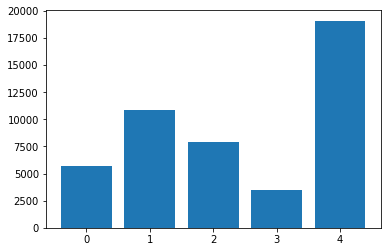

In [72]:
plt.bar(data.kmg, data.revenue)

In [82]:
data

,state,property_valuation,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,revenue,quantity,kmg
customer_id,,,,,,,,,,,,,
2950,2,6.0,1,19.0,2,0,0,1,10.0,65.0,1953.15,3,3
3120,0,5.0,0,89.0,3,0,0,1,10.0,41.0,7351.70,7,2
402,0,1.0,1,9.0,7,1,0,0,22.0,43.0,8148.22,6,1
3135,0,10.0,1,83.0,2,0,0,0,16.0,58.0,7539.81,7,2
787,0,7.0,0,29.0,7,1,0,1,2.0,24.0,11292.54,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2,4.0,1,17.0,3,0,0,1,17.0,45.0,2204.45,2,3
1569,0,10.0,1,87.0,9,0,0,0,8.0,33.0,1466.68,1,3
130,0,7.0,1,32.0,5,0,0,0,1.0,23.0,3340.42,2,3


In [104]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters =3, affinity = 'euclidean', linkage = 'complete')

In [105]:
labels = ac.fit_predict(X)

# Apply Linear Regression, Decison Regressor, Random Forest, PCA

Split the data set

In [90]:
X= data.drop(['revenue'],axis =1)
y = data.revenue

In [91]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

In [93]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_hat = lm.predict(X_test)

In [100]:
from sklearn import metrics

In [101]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

RMSE: 1451.0163847461276
